1. **Data Preparation**:
   - A dictionary is created with sample data and converted to a Pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Define the rules for generating the dataset
education_levels = ['High School', 'Bachelor\'s', 'Master\'s', 'Ph.D.']
years_of_experience = list(range(1, 11))

def pass_exam(education, experience):
    if education == 'Ph.D.':
        return 1 if experience > 3 else 0
    elif education == 'Master\'s':
        return 1 if experience > 4 else 0
    elif education == 'Bachelor\'s':
        return 1 if experience > 5 else 0
    else:  # High School
        return 1 if experience > 7 else 0

# Generate the dataset
data = {
    'Education Level': [],
    'Years of Experience': [],
    'Passed Exam': []
}

for _ in range(100):
    education = random.choice(education_levels)
    experience = random.choice(years_of_experience)
    passed = pass_exam(education, experience)
    
    data['Education Level'].append(education)
    data['Years of Experience'].append(experience)
    data['Passed Exam'].append(passed)

df = pd.DataFrame(data)

2. **Feature Engineering**:
   - The "Education Level" feature is one-hot encoded.
   - The one-hot encoded features are concatenated with the "Years of Experience" feature.

In [3]:
# One-hot encode the 'Education Level' feature
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Education Level']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['Education Level'])

In [4]:
# Create a new dataframe with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

In [5]:
# Concatenate the encoded features with the original 'Years of Experience' column
features = pd.concat([encoded_df, df[['Years of Experience']]], axis=1)

# Target variable
labels = df['Passed Exam']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

3. **Model Training**:
   - The dataset is split into training and testing sets using `train_test_split`.
   - A decision tree classifier is trained on the training data.

In [8]:
# Train decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

4. **Model Prediction**:
   - Predictions are made on the test data.

In [9]:
# Make predictions
y_pred = clf.predict(X_test)

5. **Model Evaluation**:
   - The accuracy of the model is computed.
   - A confusion matrix and classification report are generated to evaluate the model's performance.

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
[[17  0]
 [ 1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



6. **Cross-Validation**:
   - Cross-validation is performed using `cross_val_score` to evaluate the model's performance across different splits of the data.

In [13]:
# Cross-validation
cv_scores = cross_val_score(clf, features, labels, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [1.  1.  0.9 1.  1. ]
Mean CV Score: 0.9800000000000001


7. **Visualization**:
   - The decision tree is visualized.

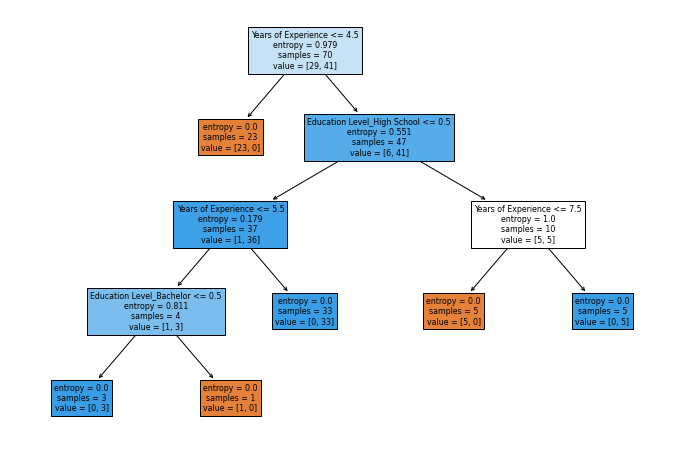

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Education Level_Bachelor','Education Level_High School','Education Level_Master','Education Level_Ph.D','Years of Experience'], filled=True)
plt.show()